<div id="toc"> </div>

# What is Feature Selection?

* **Feature Selection**: Selecting best subset of given features which is most suitable for the work at hand
    - We may have thousands of features but not enough computational powe, so we may need to reduce the number of features to a managable size
    - We may want to acheive higher genaralization ability (and reduce overfitting) from our model, so we may need to remove those variables which add very little predictive power
    - We'll almost always need to gain a better understanding of the features and their relationship to the response variable
        * We almost always will want to remove features without enough predictive power
* One of the key focus in Machine Learning is learning the most predictive **feature representation**
    - For a given representation of data, the difference between learning algorithms may not amount to much
    - Quite often, this is what data scientists are talking about when they talk about machine learning as an art

Note: In the following discussions, we'll use a regression dataset for demonstrations, but the discussions and examples are equally applicable for classification as well.

# Univariate Feature Selection

* Univariate feature selection methods examine
    - the predictive power of individual features
    - the strength of the relationship of the feature with the response variable
* These methods are simple to run and understand
* These methods are good for gaining a better understanding of data, and can often be the starting point for feature selection
* These methods are not necessarily good for optimizing the feature set for better generalization

## Removing features with low variance

* We want to remove all features whose variance doesn’t meet some threshold
* For example, we should remove all zero-variance features, i.e. features that have the same value in all samples
* As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 90% of the samples
* Boolean features are Bernoulli random variables, and the variance of such variables is given by $Var[x] = p(1-p)$

In [9]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold

X = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]])
X

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 1],
       [0, 1, 0],
       [0, 1, 1]])

In [10]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

As expected, the first column is gone.

## Pearson Correlation

* One of the simplest method for understanding a feature’s relation to the response variable is Pearson correlation coefficient, which measures linear correlation between two variables.
* Scipy‘s pearsonr method computes both the correlation and p-value for the correlation, roughly showing the probability of an uncorrelated system creating a correlation value of this magnitude.

In [1]:
import numpy as np
from scipy.stats import pearsonr
np.random.seed(0)
size = 300

x = np.random.normal(0, 1, size)
print("Lower noise", pearsonr(x, x + np.random.normal(0, 1, size)))
print("Higher noise", pearsonr(x, x + np.random.normal(0, 10, size)))

Lower noise (0.71824836862138408, 7.3240173129983507e-49)
Higher noise (0.057964292079338155, 0.31700993885324752)


* In the example above, we compare a variable with a noisy version of itself.
* With smaller amount of noise, the correlation is relatively strong, with a very low p-value, while for the noisy comparison, the correlation is very small and furthermore, the p-value is high meaning that it is very likely to observe such correlation on a dataset of this size purely by chance.

* One obvious drawback of Pearson correlation as a feature ranking mechanism is that it is only sensitive to a linear relationship.
* [If the relation is non-linear, Pearson correlation can be close to zero even if there is a 1-1 correspondence between the two variables](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).
* For example, correlation between x and x2 is zero, when x is centered on 0.

In [1]:
x = np.random.uniform(-1, 1, 100000)
print(pearsonr(x, x**2)[0])

NameError: name 'np' is not defined

## Deeper into Correlation

### Definition

The population correlation coefficient $ρ_{X,Y}$ between two random variables $X$ and $Y$ with expected values $μ_X$ and $μ_Y$ and standard deviations $σ_X$ and $σ_Y$ is defined as:

![](./images/correlation3.png)

where E is the expected value operator, cov means covariance, and corr is a widely used alternative notation for the correlation coefficient.

If we have a series of $n$ measurements of $X$ and $Y$ written as $x_i$ and $y_i$ for $i$ = $1$, $2$, ..., $n$, then the sample correlation coefficient can be used to estimate the population Pearson correlation $r$ between $X$ and $Y$. The sample correlation coefficient is written:

![](./images/correlation9.png)

* Pearson correlation is the ratio of co-variance of two variables to a product of variance (of the variables)
* The correlation coefficient has values between -1 to 1
* A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
* A value closer to 1 implies stronger positive correlation
* A value closer to -1 implies stronger negative correlation
* Pearson's correlation coefficient capture only the linear relationship between the two variables. A value of 0 doesn't imply the absence of a relationship

### Correlation is not Transitive

* Let $X$, $Y$ and $Z$ be random variables.
* $ρ_{X,Y} > 0.8$
* $ρ_{Y,Z} > 0.7$
* Can we say $ρ_{X,Z}$ will be strongly positive?

**Not really!** ($ρ_{X,Z}$ will be positive if $ρ_{X,Y}$ and $ρ_{Y,Z}$ are very close to 1)

Mathematically speaking:

$ρ_{X,Y}$ = $ρ_{Y,Z} * ρ_{Z,X} - \sqrt{ (1 - ρ_{Y,Z}^2 ) *  (1 - ρ_{Z,X}^2 )}$

### Sensitivity to outliers

Is Peason's Correlation Coefficient sensitive to outliers?

Hint: Remember the formula!

![](./images/correlation3.png)

* Means themselves are sensitive to outliers
* The correlation itself will be sensitive to outliers as well

In the following charts, the correlation is 0.81 in all four cases

![](./images/correlation10.png)

### Correlation doesn't capture non-linear relationships

![](./images/correlation2.png)

* Several sets of (x, y) points, with the Pearson correlation coefficient of x and y for each set.
* Note that the correlation reflects the noisiness and direction of a linear relationship (top row), but not the slope of that relationship (middle), nor many aspects of nonlinear relationships (bottom).
* The figure in the center has a slope of 0 but in that case the correlation coefficient is undefined because the variance of Y is zero.


### Does correlation imply causation?

**No**

### Does causation imply correlation?

**No**

Because causation can also lead to a non-linear relationship!

### Misleading Correlations

Even when Y axes measure the same category, changing the scales can alter the lines to suggest a correlation. These Y axes for RetailCo’s monthly revenue differ in range and proportional increase.

![](./images/correlation7.png)

Eliminating the second axis shows how skewed this chart is.

![](./images/correlation8.png)

### Spurious Correlations

![](./images/correlation4.png)

![](./images/correlation5.png)

![](./images/correlation6.png)

## sklearn for univariate feature selection

scikit-learn has a wide variety of functions for eliminating features based information-criteria. For performing univariate feature selection, we need to specify two parameters:

1. Selection criteria
    - **SelectKBest**: removes all but the k highest scoring features
    - **SelectPercentile**: removes all but a user-specified highest scoring percentage of features
    - using common univariate statistical tests for each feature:
        * false positive rate **SelectFpr**
        * false discovery rate **SelectFdr**
        * family wise error **SelectFwe**
    - *GenericUnivariateSelect* allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator
2. The metric to be used for selection
    - Regression
        * f_regression
        * mutual_info_regression
        * The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.
    - Classification
        * chi2
        * f_classif
        * mutual_info_classif
3. Note: Beware not to use a regression scoring function with a classification problem, you will get useless results.

## Examples

### `SelectKBest` and `f_regression` in action

* `f_regression` provides a quick linear model for testing the effect of a single regressor.
* `SelectKBest` selects the `K` best features using the provided criteria/metric (`f_regression` in this case)
* In the following example, we'll use `SelectKBest` and `f_regression` to eliminate all but two variables in the `iris` dataset.
* We'll also see how to extract the p-values and the F-scores from the fitted model. As we observed earlier, univariate methods by themselves may not be the best criteria for feature selection. However, the ranking obtained from these scores may be combined with other criteria (other rankings obtained from univariate or multivariate methods, for example) to perform feature selection.

In [27]:
from pprint import pprint
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

iris = load_iris()
X, y = iris.data, iris.target
print('Before'); pprint(X[1:5, :])

X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
print('\nAfter'); pprint(X_new[1:5, :])

Before
array([[ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

After
array([[ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2]])


When we look at `X_new`, the final output of the above sequence of commands, we see that it doesn't contain any scores/information other than what we saw.

In [28]:
type(X_new)

numpy.ndarray

We need to store the estimator in an intermediate variable. When we call the `fit_transform()` method on this estimator, the model is fitted to the data (the F-scores and p-values are computed) and the results are stored in the estimator (which are subsequently used for the transformations).

In [29]:
est = SelectKBest(f_regression, k=2)
X_new = est.fit_transform(X, y)

In [30]:
# p-values
est.pvalues_

array([  2.89047835e-32,   9.15998497e-08,   4.15547758e-76,
         4.77500237e-81])

In [31]:
# F-scores
est.scores_

array([  233.8389959 ,    31.59750825,  1342.15918918,  1589.55920433])

### Comparison of F-test and mutual information

* This example illustrates the differences between univariate F-test statistics and mutual information.
* We consider 3 features $x_1$, $x_2$, $x_3$ distributed uniformly over $[0, 1]$, the target depends on them as follows:
    - $y = x_1 + sin(6 * pi * x_2) + 0.1 * N(0, 1)$
    - the third features is irrelevant

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

* The code below plots the dependency of $y$ against individual $x_i$ and normalized values of univariate F-tests statistics and mutual information.

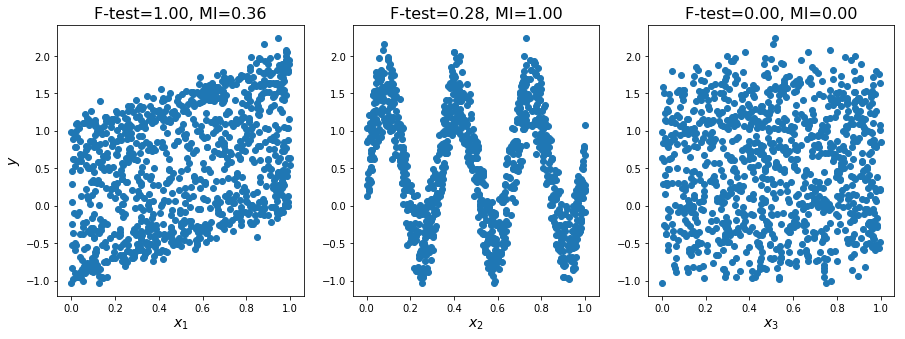

In [2]:
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.show()

* As F-test captures only linear dependency, it rates $x_1$ as the most discriminative feature.
* `mutual information` can capture any kind of dependency between variables and it rates $x_2$ as the most discriminative feature, which probably agrees better with our intuitive perception for this example.
* Both methods correctly mark $x_3$ as irrelevant.

# Multivariate Feature Elimination

## Recursive Feature Elimination (RFE)

* The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain.
* It uses an external estimator that assigns weights to features (for example, the coefficients of a linear model) to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.
* For RFE with cross-validation, see [RFECV](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV) (not covered here).

In [1]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# load the iris datasets
dataset = datasets.load_iris()

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()

# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(dataset.data, dataset.target)

# summarize the selection of the attributes
print(rfe.support_)

print(rfe.ranking_)

[False  True  True  True]
[2 1 1 1]


## Model based ranking

Methods that use ensembles of decision trees (like Random Forest and Extra Trees) can also compute the relative importance of each attribute. These importance values can be used to inform a feature selection process. 

In [6]:
# Feature Importance
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# load the iris datasets
iris = load_iris()
X, y = iris.data, iris.target

# fit an Extra Trees model to the data
clf = ExtraTreesClassifier()
clf.fit(X, y)

# display the relative importance of each attribute
print(clf.feature_importances_)

[ 0.04997232  0.07085008  0.56178933  0.31738828]


We can gather such feature importance scores from multiple models and ensemble them. Otherwise we can use the scores from the same model to prune some features and refit the model using the rest of the features using `SelectFromModel`.

In [7]:
from sklearn.feature_selection import SelectFromModel
from pprint import pprint

print('Before'); pprint(X.shape)

clf = ExtraTreesClassifier()
clf.fit(X, y)

print('\nFeature Importance'); pprint(clf.feature_importances_)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print('\nAfter'); pprint(X_new.shape)

Before
(150, 4)

Feature Importance
array([ 0.08614172,  0.06616756,  0.38664669,  0.46104403])

After
(150, 2)


**Quiz**: Why were two features eliminated?

### Example with Random Forest

This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


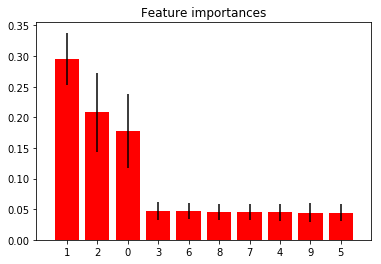

In [2]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

The plot suggests that 3 features are informative, while the remaining are not.